(1026, 14)
['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']
[[52.  1.  0. ...  2.  3.  0.]
 [53.  1.  0. ...  0.  3.  0.]
 [70.  1.  0. ...  0.  3.  0.]
 ...
 [47.  1.  0. ...  1.  2.  0.]
 [50.  0.  0. ...  0.  2.  1.]
 [54.  1.  0. ...  1.  3.  0.]]
(1025, 13)
(1025,)
(13, 1025)
(1025,)
X_train shape (13, 820)
Y_train shape (820,)
Number of training examples = 820
----------------------------------------
X_test shape (13, 205)
Y_test shape (205,)
Number of testing examples = 205
Cost after 1 iteration: 0.6931471805599453
Cost after 101 iteration: 0.7723673062806203
Cost after 201 iteration: 0.6739935941292493
Cost after 301 iteration: 0.641782495209394
Cost after 401 iteration: 0.6285874648436626
Cost after 501 iteration: 0.622941525571305
Cost after 601 iteration: 0.6201697454114335
Cost after 701 iteration: 0.6184454501252112
Cost after 801 iteration: 0.6171017392671803
Cost after 901 iteration: 0.6159023055650773
Cost a

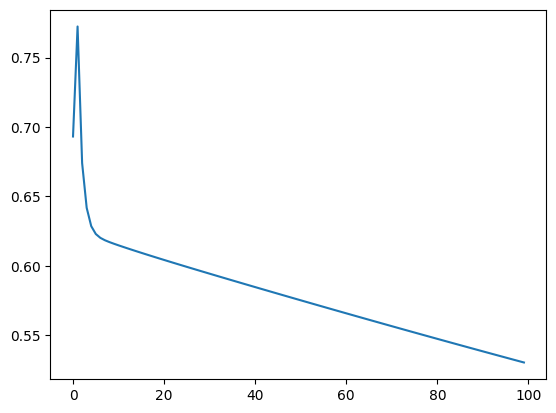

Train accuracy: 73.29268292682926 %
Test accuracy: 71.21951219512195 %


In [17]:
import numpy as np
import matplotlib.pyplot as plt
dataset_raw = np.genfromtxt("C:\\Users\\rupan\\Downloads\\heart.csv", dtype="str", delimiter=",")
print(dataset_raw.shape)

headers = dataset_raw[0, :]
print(headers)

dataset = dataset_raw[1:, :]
dataset = dataset.astype(float)
print(dataset)
X = dataset[:, :13]
Y = dataset[:, 13]
print(X.shape)
print(Y.shape)
X = X.T
print(X.shape)
print(Y.shape)
index = int(0.8 * X.shape[1])

# split the data
X_train = X[:, :index]
X_test = X[:, index:]

Y_train = Y[:index]
Y_test = Y[index:]
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("Number of training examples =", Y_train.shape[0])
print("-"*40)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)
print("Number of testing examples =", Y_test.shape[0])
def init_params(num_features):

    W = np.zeros((num_features, 1))
    b = 0

    return W, b

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

def forward_prop(W, b, X):
    Z = np.dot(W.T,X) + b   
    A = sigmoid(Z)
    
    return A
def calculate_loss(A, Y):
    # get number of examples
   
    m = Y.shape[0]
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    cost = np.squeeze(cost)
    return cost

def backward_prop(A, X, Y):
   
        
    m = Y.shape[0]
    dZ = A-Y
    dW = 1/ m* np.dot(X ,dZ.T)
    db = 1/ m* np.sum(dZ)
    return dW, db
def update_params(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    return W, b

def predict(W, b, X):
    A = forward_prop(W, b, X)
    Y_pred = (A>=0.5)*1.0
    return Y_pred
def train(X, Y, num_iterations=10000, learning_rate=0.0001, print_cost=True):
    # Initialize parameters
    W, b = init_params(X.shape[0])

    # Keep track of costs
    costs = []

    for i in range(num_iterations):
        # Forward propagation
        A = forward_prop(W, b, X)

        # Calculate cost
        cost = calculate_loss(A, Y)

        # Backward propagation
        dW, db = backward_prop(A, X, Y)

        # Parameter updation
        W, b = update_params(W, b, dW, db, learning_rate)

        # Store cost after every few iterations
        if i % 100 == 0:
            costs.append(cost)

        # Print cost after every few iterations
        if print_cost and i % 100 == 0:
            print(f"Cost after {i+1} iteration: {cost}")

    return W, b, costs

W, b, costs = train(X_train, Y_train)

plt.plot(costs)
plt.show()

print("Train accuracy: {} %".format(100 - np.mean(np.abs(predict(W, b, X_train) - Y_train)) * 100))
print("Test accuracy: {} %".format(100 - np.mean(np.abs(predict(W, b, X_test) - Y_test)) * 100))